In [1]:
# load basic packages
# include("/Users/federicoclaudi/Documents/Github/LocomotionControl/analysis/behavior/analysis_fixtures.jl")
# include("/Users/federicoclaudi/Documents/Github/LocomotionControl/analysis/behavior/analysis_visuals.jl")
include("C:\\Users\\Federico\\Documents\\GitHub\\pysical_locomotion\\analysis\\behavior\\analysis_fixtures.jl")
include("C:\\Users\\Federico\\Documents\\GitHub\\pysical_locomotion\\analysis\\behavior\\analysis_visuals.jl")


import jcontrol.bicycle: Bicycle
import jcontrol.control: Bounds, ControlOptions
import InfiniteOpt: termination_status
import jcontrol.Run: run_mtm
import jcontrol: toDict

  Activating project at `~/Documents/Github/LocomotionControl/analysis/behavior`


@Info (Main):  Loaded 995 trials 
  ╰────────────────────────────────────────────────

 
                      Wed, 06 Jul 2022 22:24:11 
@Info (Main):  After tortuosity analysis, discarded 8.643% of trials | 909 

 
  │                trials left 
  ╰──────────────────────────────────────────────── 
                      Wed, 06 Jul 2022 22:24:13 


F8: global MTM while varying parameters and cost function.

In [2]:
globalsolution = load_global_solution();

# Cost function

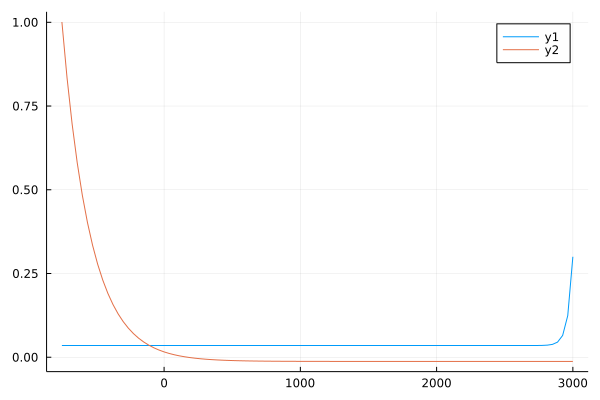

In [3]:
using EasyFit

x = -750:3000

one(x) = (1.00e-6) * exp(- x / (-217.199) + -5.001e-5)
two(x) = (0.008) * exp(- x / (156.58) + -0.0039)

fit = fitexp([-750, 1000, 2500, 3000], [.0, .005, .1, .3])
fit2 = fitexp([-750, -500, 0, 3000], [1, .3, 0, 0])

plot(fit.x,fit.y)
plot!(fit2.x, fit2.y)

# plot!(x, one.(x))
# plot!(x, two.(x))

In [4]:
fit


 ------------ Single Exponential fit ----------- 

 Equation: y = a exp(-x/b) + c

 With: a = 4.186336750206255e-39
       b = -34.46654885618554
       c = 0.03499994582245388

 Pearson correlation coefficient, R = 0.9446731532209339
 Average square residue = 0.0015874957314245153

 Predicted Y: ypred = [0.03499994582245388, 0.03499994582245388...
 residues = [0.03499994582245388, 0.02999994582245388...

 ----------------------------------------------- 


## RUN simulations

In [5]:
savepath = "/Users/federicoclaudi/Dropbox (UCL)/Rotation_vte/Locomotion/analysis/behavior/mtm_cost_function"

# """
# Runs the MTM problem while systematically changing the alpha factor of the cost function
#     to assess the effect on behavior
# """


# for γ in range(0.001, stop=0.04, length=20)
#     _, _, control_model, solution = run_mtm(
#         :dynamics,  # model type
#         2.0;  # supports density
#         showtrials=nothing,
#         showplots=false,
#         quiet=true,
#         γ = γ,
#         α=0.0,
#     )

#     if "LOCALLY_SOLVED" == string(termination_status(control_model))
#         destination = joinpath(savepath, "cost_fn_alpha_0_gamma_$(γ).csv")
#         data = DataFrame(toDict(solution))
#         CSV.write(destination, data)
#     else
#         println(termination_status(control_model))
#     end
# end


for α in range(1e-10, stop=1, length=25)
    println("Doing $(α)")
    _, _, control_model, solution = run_mtm(
        :dynamics,  # model type
        2.0;  # supports density
        showtrials=nothing,
        showplots=false,
        quiet=true,
        # n_iter=10_000,
        α = α,
        γ = 0.0,
    )

    if "LOCALLY_SOLVED" == string(termination_status(control_model))
        destination = joinpath(savepath, "cost_fn_alpha_$(α)_gamma_0.csv")
        data = DataFrame(toDict(solution))
        CSV.write(destination, data)
    else
        println(termination_status(control_model))
    end
end

Doing 1.0e-10



******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

Doing 0.0416666667625


Doing 0.083333333425


Doing 0.1250000000875


Doing 0.16666666675


Doing 0.2083333334125


Doing 0.250000000075


Doing 0.2916666667375


Doing 0.3333333334


Doing 0.3750000000625


Doing 0.416666666725


Doing 0.4583333333875


Doing 0.50000000005


Doing 0.5416666667125


Doing 0.583333333375


Doing 0.6250000000375


Doing 0.6666666667


Doing 0.7083333333625


Doing 0.750000000025


Doing 0.7916666666875


Doing 0.83333333335


Doing 0.8750000000125


Doing 0.916666666675


Doing 0.9583333333375


Doing 1.0


## Analysis

In [11]:
import OrderedCollections: OrderedDict

# load simulations
solutions, _names = load_mtm_solutions(folder=savepath, name="cost_fn_alpha_");

for (solution, name) in zip(solutions, _names)
    println(name, "  ", solution.t[end])
end

γ_solutions = OrderedDict()
α_solutions = OrderedDict()
for (name, sol) in zip(_names, solutions)
    α = parse(Float64, split(name, "_")[4])
    γ = parse(Float64, split(name, "_")[6][1:end-4])

    if α == 0.0
        γ_solutions[γ] = sol
    else
        α_solutions[α] = sol
    end
end
sort!(α_solutions)
sort!(γ_solutions)

α_solutions

cost_fn_alpha_0.3333333334_gamma_0.csv  5.680141556402913
cost_fn_alpha_0.6666666667_gamma_0.csv  5.91010731646677
cost_fn_alpha_0.16666666675_gamma_0.csv  5.480004388794292
cost_fn_alpha_0.50000000005_gamma_0.csv  5.80011439707561
cost_fn_alpha_0.83333333335_gamma_0.csv  6.000040291018621
cost_fn_alpha_0.083333333425_gamma_0.csv  5.32010527021775
cost_fn_alpha_0.250000000075_gamma_0.csv  5.590159891540279
cost_fn_alpha_0.416666666725_gamma_0.csv  5.740113263427279
cost_fn_alpha_0.0416666667625_gamma_0.csv  5.180095837408244
cost_fn_alpha_0.583333333375_gamma_0.csv  5.860143231004541
cost_fn_alpha_0.750000000025_gamma_0.csv  5.9600476755828025
cost_fn_alpha_0.916666666675_gamma_0.csv  6.040175938661331
cost_fn_alpha_0.1250000000875_gamma_0.csv  5.410150977939622
cost_fn_alpha_0.2083333334125_gamma_0.csv  5.540154917113025
cost_fn_alpha_0.2916666667375_gamma_0.csv  5.640167489759005
cost_fn_alpha_0.3750000000625_gamma_0.csv  5.710014569861124
cost_fn_alpha_0.4583333333875_gamma_0.csv  5

OrderedDict{Any, Any} with 25 entries:
  1.0e-10   => Solution(0.01, [-4.54646e-42, 0.0103969, 0.0203605, 0.0303242, 0…
  0.0416667 => Solution(0.01, [-6.32324e-45, 0.0102323, 0.0200197, 0.030252, 0.…
  0.0833333 => Solution(0.01, [-3.80045e-43, 0.0103945, 0.020337, 0.0302795, 0.…
  0.125     => Solution(0.01, [-1.44262e-42, 0.0100273, 0.0200547, 0.030082, 0.…
  0.166667  => Solution(0.01, [-9.53756e-46, 0.0100869, 0.0201738, 0.0302607, 0…
  0.208333  => Solution(0.01, [3.60334e-43, 0.0101351, 0.0202702, 0.0304053, 0.…
  0.25      => Solution(0.01, [-2.31009e-41, 0.0101769, 0.0203538, 0.0300682, 0…
  0.291667  => Solution(0.01, [-2.43124e-44, 0.0102123, 0.0204246, 0.0301727, 0…
  0.333333  => Solution(0.01, [-1.98936e-45, 0.0102433, 0.0200209, 0.0302641, 0…
  0.375     => Solution(0.01, [6.81006e-45, 0.0102705, 0.0200742, 0.0303448, 0.…
  0.416667  => Solution(0.01, [-2.7672e-45, 0.0102948, 0.0201216, 0.0304163, 0.…
  0.458333  => Solution(0.01, [-9.01515e-45, 0.0103167, 0.0201644, 0.0

### plot trajectories

In [6]:
function make_palette_blue(x)
    return range(HSL(220, .24, .30), stop=HSL(204, .7, .8), length=length(x))
end


function make_palette_red(x)
    return range(HSL(355, .24, .30), stop=HSL(350, .7, .8), length=length(x))
end


make_palette(class, x) = class == :γ ? make_palette_blue(x) : make_palette_red(x)

make_palette_red(zeros(100))

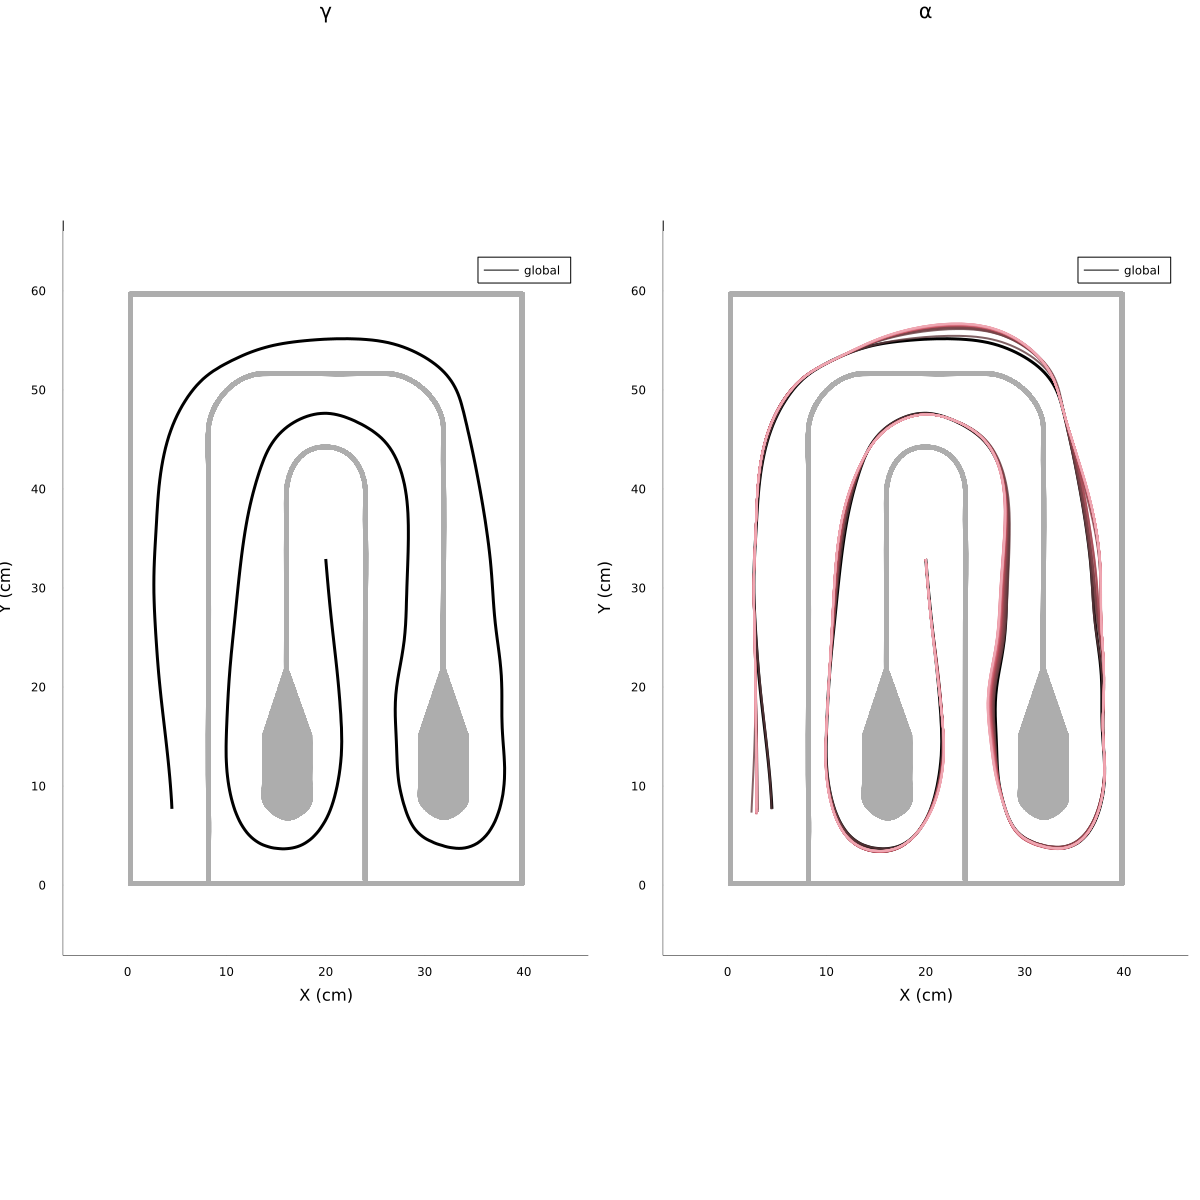

In [22]:

plots = []


for (var, sols) in zip((:γ, :α), (γ_solutions, α_solutions))
    plt = draw(:arena)
    # draw!.(trials[1:100]; alpha=.1)
    plot!(globalsolution.x, globalsolution.y, color="black", lw=3, label="global")
    colors = make_palette(var, sols)

    for (n, solution) in enumerate(sols)
        plot!(solution.second.x, solution.second.y, lw=2, alpha=.8, color=colors[n], 
                # label="$var: $(solution.first) - ($(round(solution.second.t[end]; digits=2))s)"
                label=nothing,
                ) 
    end
    plot!(; title=var)
    push!(plots, plt)
end


fig = plot(plots...; grid=false)
savefig(fig, joinpath(PLOTS_FOLDER, "global_mtm_cost_fn_xy.svg"))

fig

### plot durations

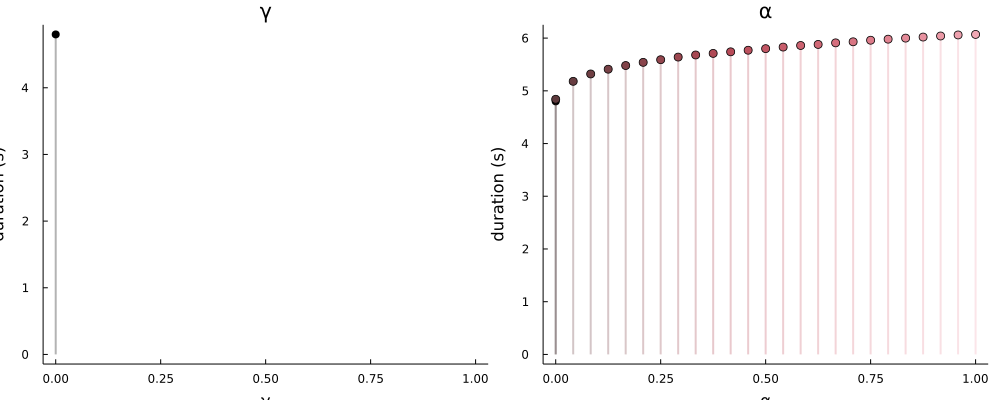

In [21]:
plots = []


for (var, sols) in zip((:γ, :α), (γ_solutions, α_solutions))
    plt = plot(; xlabel=var, ylabel="duration (s)")
    plot!(
        [0, 0],
        [0, globalsolution.t[end]],
        lw =2, color="black", alpha=.3, label=nothing
    )

    scatter!(
        [0],
        [globalsolution.t[end]],
        ms=5, color="black", label=nothing
    )
    
    colors = make_palette(var, sols)

    for (n, solution) in enumerate(sols)
        # plot!(solution.second.x, solution.second.y, lw=2, alpha=.8, color=colors[n], 
        #         label="$var: $(solution.first) - ($(round(solution.second.t[end]; digits=2))s)"
                
        #         ) 

        plot!(
            [solution.first, solution.first],
            [0, solution.second.t[end]],
            lw =2, color=colors[n], alpha=.3, label=nothing
        )

        scatter!(
            [solution.first],
            [solution.second.t[end]],
            ms=5, color=colors[n], label=nothing
        )
    end
    plot!(; title=var)
    push!(plots, plt)
end


fig = plot(plots...; grid=false, size=(1000, 400))
savefig(fig, joinpath(PLOTS_FOLDER, "global_mtm_cost_fn_duration.svg"))

fig


### plot speed traces

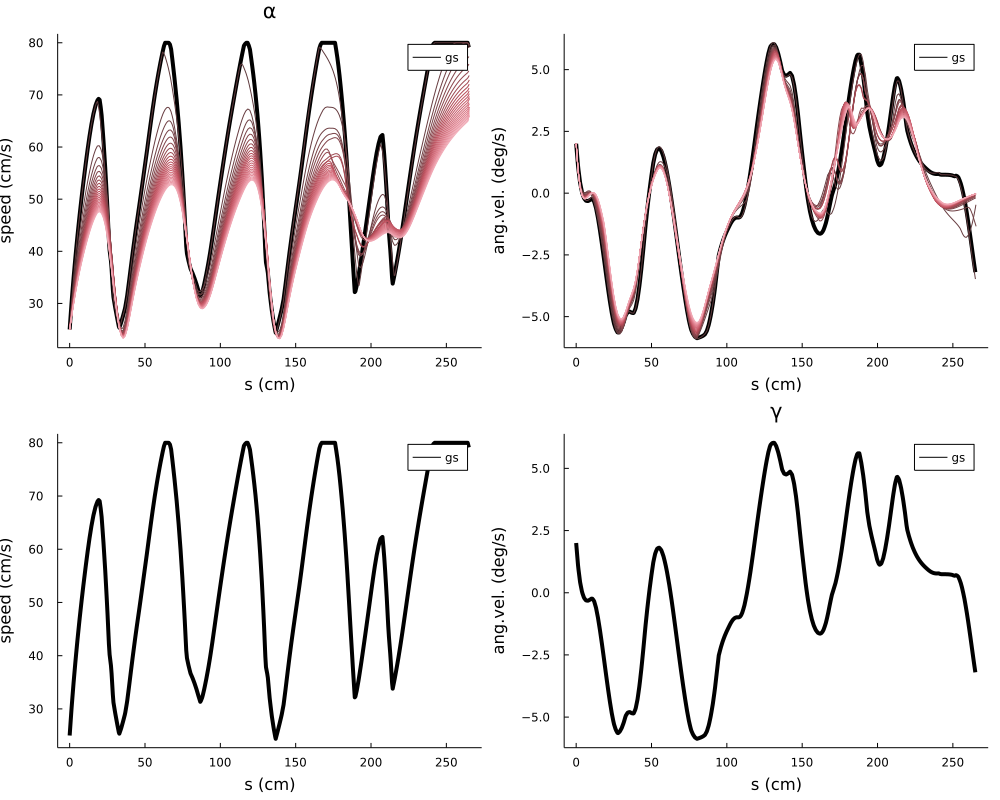

In [23]:
gs_u = get_solution_variable_at_s_values(globalsolution, 0, 258, 1, :u)
_s = 1:258

# plt = scatter(_s, gs_u, color="black", label="gs")
u_plot_α = plot(globalsolution.s, globalsolution.u, color="black", label="gs", lw=4; xlabel="s (cm)", ylabel="speed (cm/s)", title="α")
o_plot_α = plot(globalsolution.s, globalsolution.ω, color="black", label="gs", lw=4, xlabel="s (cm)", ylabel="ang.vel. (deg/s)")

u_plot_γ = plot(globalsolution.s, globalsolution.u, color="black", label="gs", lw=4; xlabel="s (cm)", ylabel="speed (cm/s)")
o_plot_γ = plot(globalsolution.s, globalsolution.ω, color="black", label="gs", lw=4, xlabel="s (cm)", ylabel="ang.vel. (deg/s)", title="γ")

for (var, sols) in zip((:γ, :α), (γ_solutions, α_solutions))
    colors = make_palette(var, sols)

    if var == :γ
        u_plot, o_plot = u_plot_γ, o_plot_γ
    else
        u_plot, o_plot = u_plot_α, o_plot_α
    end

    for (n, solution) in enumerate(sols)
        plot!(u_plot,
            solution.second.s, solution.second.u, color=colors[n], label=nothing
        )
        plot!(o_plot,
        solution.second.s, solution.second.ω, color=colors[n], label=nothing
    )
    end
    
end

fig = plot(u_plot_α, o_plot_α, u_plot_γ, o_plot_γ; size=(1000, 800), grid=false, link=:x)
savefig(fig, joinpath(PLOTS_FOLDER, "global_mtm_cost_fn_lin_tracking.svg"))

fig



### plot distance from global solution

In [10]:
function Λ(x1, x2, y1, y2)
    dst = @. sqrt(((x1 - x2)^2 + (y1 - y2)^2))
    mean(dst), std(dst)
end


Λ (generic function with 1 method)

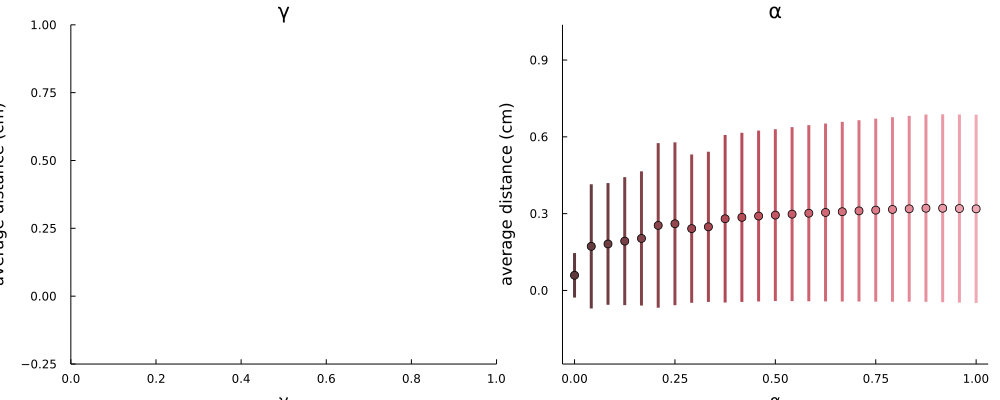

In [19]:
gs_x = get_solution_variable_at_s_values(globalsolution, 0, 258, 1, :x)
gs_y = get_solution_variable_at_s_values(globalsolution, 0, 258, 1, :y)

plots = []
for (var, sols) in zip((:γ, :α), (γ_solutions, α_solutions))

    colors = make_palette(var, sols)
    plt = plot(; xlabel=var, ylabel="average distance (cm)")
    for (n, solution) in enumerate(sols)
        sol_x = get_solution_variable_at_s_values(solution.second, 0, 258, 1, :x)
        sol_y = get_solution_variable_at_s_values(solution.second, 0, 258, 1, :y)

        dist, dst_std =  Λ(gs_x, sol_x, gs_y, sol_y)
        
        plot!(
            [solution.first, solution.first],
            [dist-dst_std, dist+dst_std],
            color=colors[n], label=nothing, lw=3,
        )


        scatter!(
            [solution.first],
            [dist],
            ms=5, color=colors[n], label=nothing
        )
    end
    plot!(; title=var,)
    push!(plots, plt)
end


fig = plot(plots...; grid=false, ylim=[-.25, 1.0], size=(1000, 400))
savefig(fig, joinpath(PLOTS_FOLDER, "global_mtm_cost_fn_mean_error.svg"))

fig

# Parameters

In [15]:
savepath = "/Users/federicoclaudi/Dropbox (UCL)/Rotation_vte/Locomotion/analysis/behavior/mtm_parameters"

p = -1:.1:1
@info "Number of values per parameter: $(length(p))"

@Info (Main):  Number of values per parameter: 21 
  ╰──────────────────────────────────────────────── 
                      Wed, 06 Jul 2022 22:20:26 


In [16]:
bike_default = Dict(
    :l_f=>3,
    :l_r=>2,
    :width=>2,
    # :m_f=>10, 
    # :m_r=>12, 
    :c=>4e3
)

bike_Δ = Dict(
    # :l_f=>bike_default[:l_f] * 0.5,
    # :l_r=>bike_default[:l_r] * 0.5,
    :width=>bike_default[:width] * 0.5,
    # :m_f=>bike_default[:m_f] * 0.5,
    # :m_r=>bike_default[:m_r] * 0.5,
    # :c=>bike_default[:c] * 0.53,
)

@info "Tot N simulations for bike: $(length(p) * length(bike_Δ))"

@Info (Main):  Tot N simulations for bike: 21 
  ╰──────────────────────────────────────────────── 
                      Wed, 06 Jul 2022 22:20:26 


### Run simulations

In [17]:
count = 1
for (parameter, pΔ) in pairs(bike_Δ)
    @info "Running simulations for: $(parameter)"
    for pval in p
        kwargs = (parameter => bike_default[parameter] + pΔ * pval, )
        bike = Bicycle(; kwargs...)

        _, _, control_model, solution = run_mtm(
            :dynamics,  # model type
            2.0;  # supports density
            showtrials=nothing,
            showplots=false,
            quiet=true,
            bike=bike
        )
        
        if "LOCALLY_SOLVED" == string(termination_status(control_model))
            destination = joinpath(savepath, "bike_param_$count.csv")
            data = DataFrame(toDict(solution))
            CSV.write(destination, data)
        else
            @warn "Failed" termination_status(control_model)
        end
        count += 1
    end
end

### Params metadata

In [ ]:
import OrderedCollections: OrderedDict
params_metadata = Dict{Int64, Pair}()

count = 1
for (parameter, pΔ) in pairs(bike_Δ)
    for pval in p
        params_metadata[count] =  parameter => bike_default[parameter] + pΔ * pval

        count += 1
    end
end

"""
For each parameter get the ID of all the simulations that 
varied that parameter values
"""
function get_param_runs_ids(param::Symbol)
    res = OrderedDict{Int64, Number}()

    for (id, (sim_param, value)) in pairs(params_metadata)
       if sim_param == param
        res[id] = value
       end
    end

   return sort!(res)
end


### Analysis

In [ ]:
solutions, _names = load_mtm_solutions(; folder=savepath, name="")
@info "Loaded $(length(solutions)) solutions"
solutions_ids = map(n -> parse(Int64, split(split(n, "_")[3], ".")[1]), _names);

solutions = Dict(_id=>sol for (_id, sol) in zip(solutions_ids, solutions))

In [ ]:
diverging_palette(250, 1, s=.5, b=1,  )

In [ ]:
plots = []
colors = diverging_palette(250, 1, length(p); s=.5, b=1.0, w=.25)

for para in keys(bike_Δ)
    runs_ids = get_param_runs_ids(para)

    param_solutions = [(get(solutions, _id, nothing), val) for (_id, val) in runs_ids]

    plt = draw(:arena)
    plot!(
        globalsolution.x, globalsolution.y, 
        lw=6, color="black",
        label="global"
    )

    for (n, (sol, val)) in enumerate(param_solutions)
        isnothing(sol) && continue
        plot!(sol.x, sol.y, 
            lw=2, color=colors[n],
            label="$(para): $(round(val; digits=2)) - ($(round(sol.t[end]; digits=2)), s)")
    end



    plot!(title=para)
    push!(plots, plt)

end

fig = plot(plots...; grid=false, legend=false)
savefig(fig, joinpath(PLOTS_FOLDER, "global_mtm_params_XY.svg"))

fig


In [ ]:
plots = []

for para in keys(bike_Δ)
    runs_ids = get_param_runs_ids(para)

    param_solutions = [(get(solutions, _id, nothing), val) for (_id, val) in runs_ids]

    
    plt = plot(; para=var, ylabel="duration (s)", ylim=[4, 7])

    default_val = bike_default[para]
    plot!(
        [default_val, default_val],
        [0, globalsolution.t[end]],
        lw =2, color="black", alpha=.3, label=nothing
    )

    scatter!(
        [default_val],
        [globalsolution.t[end]],
        ms=5, color="black", label=nothing
    )
    

    for (n, (sol, val)) in enumerate(param_solutions)
        isnothing(sol) && continue
        plot!(
            [val, val],
            [0, sol.t[end]],
            lw =2, color=colors[n], alpha=.3, label=nothing
        )

        scatter!(
            [val],
            [sol.t[end]],
            ms=5, color=colors[n], label=nothing
        )
    end
    plot!(; title=para)
    push!(plots, plt)
end


fig = plot(plots...; grid=false, size=(1000, 400))
savefig(fig, joinpath(PLOTS_FOLDER, "global_mtm_params_duration.svg"))

fig


### plot duration vs error

In [ ]:
gs_x = get_solution_variable_at_s_values(globalsolution, 0, 258, 1, :x)
gs_y = get_solution_variable_at_s_values(globalsolution, 0, 258, 1, :y)


plots = []
for para in keys(bike_Δ)
    runs_ids = get_param_runs_ids(para)

    param_solutions = [(get(solutions, _id, nothing), val) for (_id, val) in runs_ids]
    plt = plot()


    for (n, (sol, val)) in enumerate(param_solutions)
        isnothing(sol) && continue
        sol_x = get_solution_variable_at_s_values(sol, 0, 258, 1, :x)
        sol_y = get_solution_variable_at_s_values(sol, 0, 258, 1, :y)

        dist =  mean(@. sqrt(((gs_x - sol_x)^2 + (gs_y - sol_y)^2)))
        
        scatter!(
            [val],
            [dist],
            ms=5, color=colors[n], label=nothing
        )
    end
    plot!(; title=para, ylim=[0, .7], ylabel="Mean distance (cm)", xlabel=para)
    push!(plots, plt)
end


fig = plot(plots...; grid=false, size=(1000, 400))
savefig(fig, joinpath(PLOTS_FOLDER, "global_mtm_params_mean_error.svg"))

fig